<a href="https://colab.research.google.com/github/RileyWClarke/MLTSA_COVID19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLTSA COVID-19 Project

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

## Data Import/Overview

In [3]:
!pip install kaggle

In [4]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!pwd

/content


In [6]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [7]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [10]:
!kaggle datasets list -s coronavirus

ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
unanimad/corona-virus-brazil                                    Coronavirus - Brazil                                  5KB  2020-03-25 20:26:39           2103  
jamzing/sars-coronavirus-accession                              SARS CORONAVIRUS ACCESSION                            2MB  2020-02-18 15:49:34           2601  
paultimothymooney/coronavirus-genome-sequence                   Coronavirus Genome Sequence                           9MB  2020-02-29 00:25:13            625  
ardisragen/indonesia-coronavirus-cases                          Indonesia-Coronavirus                                 5KB  2020-03-24 10:23:05            318  
gpreda/coronavirus-2019ncov             

In [11]:
!mkdir COVID19

mkdir: cannot create directory ‘COVID19’: File exists


In [12]:
cd COVID19

/content/gdrive/My Drive/COVID19


In [13]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [14]:
cd data

/content/gdrive/My Drive/COVID19/data


In [15]:
!kaggle datasets download kimjihoo/coronavirusdataset

 39% 1.00M/2.53M [00:00<00:00, 3.17MB/s]
100% 2.53M/2.53M [00:00<00:00, 7.25MB/s]


In [16]:
ls

Case.csv                PatientRoute.csv  TimeAge.csv     TimeProvince.csv
coronavirusdataset.zip  Region.csv        Time.csv        Weather.csv
PatientInfo.csv         SearchTrend.csv   TimeGender.csv


In [17]:
!unzip coronavirusdataset.zip

Archive:  coronavirusdataset.zip
replace Case.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Case.csv                
  inflating: PatientInfo.csv         
  inflating: PatientRoute.csv        
  inflating: Region.csv              
  inflating: SearchTrend.csv         
  inflating: SeoulFloating.csv       
  inflating: Time.csv                
  inflating: TimeAge.csv             
  inflating: TimeGender.csv          
  inflating: TimeProvince.csv        
  inflating: Weather.csv             


In [33]:
ts = pd.read_csv('Time.csv')
ts.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [19]:
ts.shape

(63, 7)

In [21]:
ts['date'] = pd.to_datetime(ts['date'])
ts.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [22]:
ts.columns

Index(['date', 'time', 'test', 'negative', 'confirmed', 'released',
       'deceased'],
      dtype='object')

In [0]:
ts.set_index("date", inplace=True)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


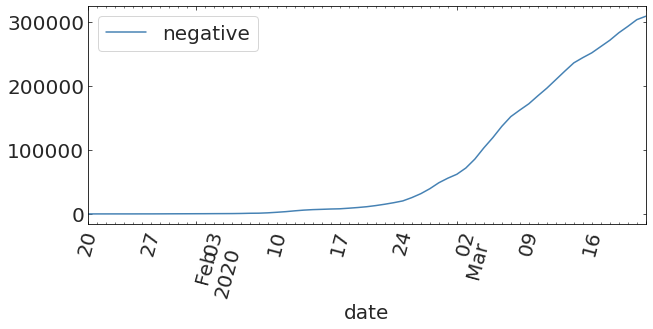

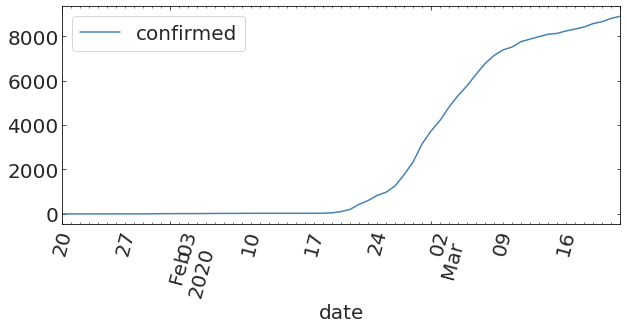

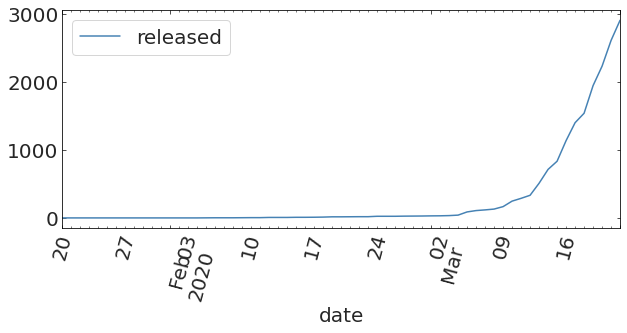

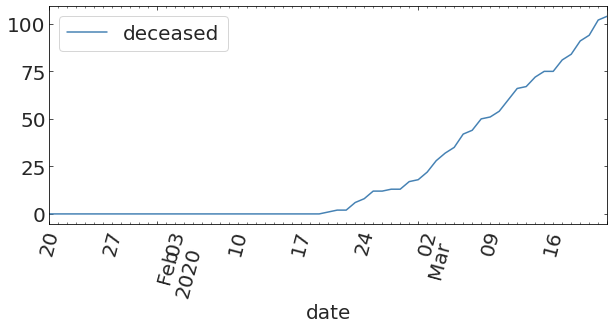

In [27]:
for c in ts.columns[2:]:
    fig, ax = plt.subplots(figsize=(10,4))
    ts.plot(y=c, ax=ax, rot=75)

#Proof-of-concept Plots

In [28]:
!pip install fbprophet
import fbprophet

In [0]:
from fbprophet import Prophet
from fbprophet import diagnostics

In [0]:
ts.rename({"confirmed":"y"}, axis=1, inplace=True)
ts["ds"] = ts['date']

In [41]:
ts.head()

,date,time,test,negative,y,released,deceased,ds
0,2020-01-20,16,1,0,1,0,0,2020-01-20
1,2020-01-21,16,1,0,1,0,0,2020-01-21
2,2020-01-22,16,4,3,1,0,0,2020-01-22
3,2020-01-23,16,22,21,1,0,0,2020-01-23
4,2020-01-24,16,27,25,2,0,0,2020-01-24


In [52]:
ts.tail()

,date,time,test,negative,y,released,deceased,ds
58,2020-03-18,0,295647,270888,8413,1540,84,2020-03-18
59,2020-03-19,0,307024,282555,8565,1947,91,2020-03-19
60,2020-03-20,0,316664,292487,8652,2233,94,2020-03-20
61,2020-03-21,0,327509,303006,8799,2612,102,2020-03-21
62,2020-03-22,0,331780,308343,8897,2909,104,2020-03-22


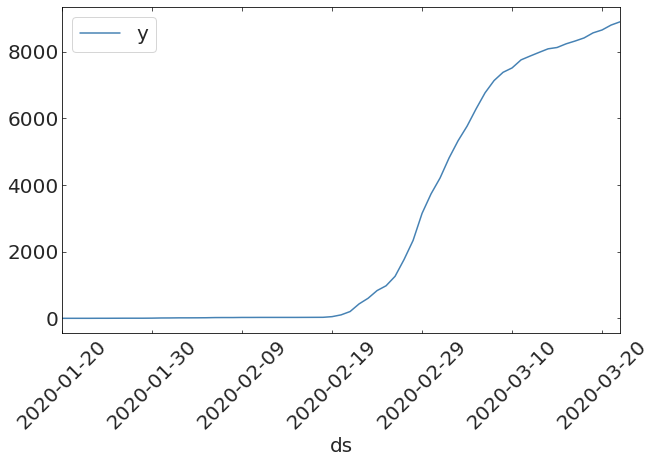

In [45]:
ts.plot(x="ds", y="y")
plt.xticks(rotation=45);

## Simple Linear Model

In [85]:
model_1 = Prophet()
model_1.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
future = model_1.make_future_dataframe(periods=30)
forecast = model_1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
88,2020-04-17,18028.735841,16660.339858,19320.195808
89,2020-04-18,18352.552454,16981.969914,19599.951070
90,2020-04-19,18619.478394,17234.722984,20028.349159
91,2020-04-20,19067.086559,17607.709442,20525.653410
92,2020-04-21,19331.518175,17872.637429,20818.494824


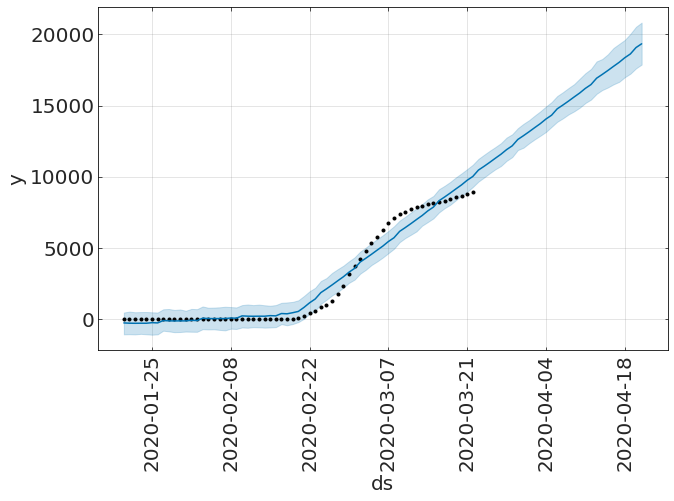

In [87]:
fig1 = model_1.plot(forecast)
plt.xticks(rotation=90);

## Non-Linear Model

In [0]:
ts['cap'] = np.full(len(ts),10000)

In [94]:
ts.head()

,date,time,test,negative,y,released,deceased,ds,cap
0,2020-01-20,16,1,0,1,0,0,2020-01-20,10000
1,2020-01-21,16,1,0,1,0,0,2020-01-21,10000
2,2020-01-22,16,4,3,1,0,0,2020-01-22,10000
3,2020-01-23,16,22,21,1,0,0,2020-01-23,10000
4,2020-01-24,16,27,25,2,0,0,2020-01-24,10000


In [95]:
model_2 = Prophet(growth="logistic")
model_2.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
future = model_2.make_future_dataframe(periods=30)
future['cap'] = np.full(len(future), 10000)
forecast = model_2.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
88,2020-04-17,9969.088830,9406.271750,10502.050344
89,2020-04-18,10012.080720,9445.675516,10596.167480
90,2020-04-19,9997.539811,9447.622796,10521.912666
91,2020-04-20,10050.923100,9450.239213,10591.481522
92,2020-04-21,10006.725752,9448.645668,10570.194470


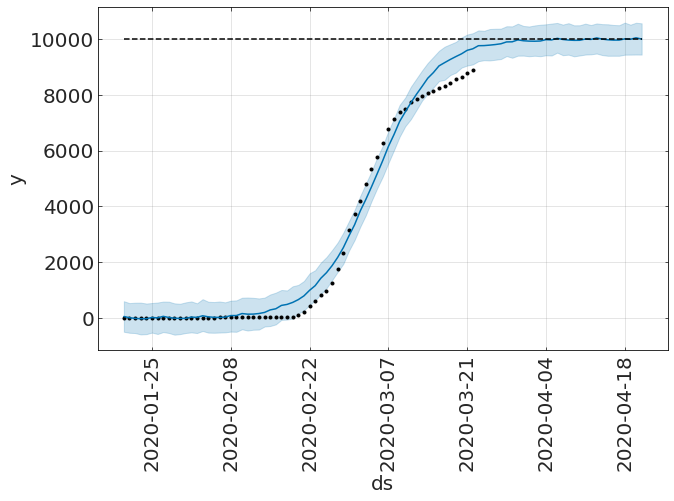

In [103]:
fig2 = model_2.plot(forecast)
plt.xticks(rotation=90);